In [1]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

## Import Data

In [2]:
df_daily = pd.read_csv(
    "https://raw.githubusercontent.com/thoo/covid-tracking-data/master/data/states_daily_4pm_et.csv",
    parse_dates=["date", "lastUpdateEt", "dateModified", "dateChecked"],
)
df_daily.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-07-25,AK,2868.0,202198.0,NaN,38.0,NaN,NaN,NaN,2.0,...,205066,1,0,5f2c5ca08d30c7fa77bfd21e75840efa1435f3cd,0,0,0,0,0,NaN
1,2020-07-25,AL,78130.0,563481.0,NaN,1425.0,9157.0,NaN,1069.0,NaN,...,641611,18,0,8d1bda5ff4d4985142b55becccbea692e56abfda,0,0,0,0,0,NaN
2,2020-07-25,AR,37249.0,424215.0,NaN,497.0,2361.0,NaN,NaN,109.0,...,461464,0,0,a3452a99a044e2e12f08a21b96dbef0d9362e5c2,0,0,0,0,0,NaN
3,2020-07-25,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,0d7a633be32b1ba4de5e5b83e4541495d606dc79,0,0,0,0,0,NaN
4,2020-07-25,AZ,160041.0,697568.0,NaN,2758.0,7627.0,842.0,NaN,594.0,...,857609,144,166,086654feacad18d4c1af2297f08891f51d9cbcc2,0,0,0,0,0,NaN


In [3]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   date                      7969 non-null   datetime64[ns]     
 1   state                     7969 non-null   object             
 2   positive                  7954 non-null   float64            
 3   negative                  7813 non-null   float64            
 4   pending                   1046 non-null   float64            
 5   hospitalizedCurrently     5405 non-null   float64            
 6   hospitalizedCumulative    4223 non-null   float64            
 7   inIcuCurrently            2742 non-null   float64            
 8   inIcuCumulative           1137 non-null   float64            
 9   onVentilatorCurrently     2402 non-null   float64            
 10  onVentilatorCumulative    402 non-null    float64            
 11  recovered        

In [3]:
def getcols(name,df):
    return [col for col in df.columns if name in col]

In [4]:
getcols('date',df_daily)

['date', 'lastUpdateEt', 'dateModified', 'dateChecked']

In [5]:
df_daily['daily_positive_rate'] = round(df_daily['positiveIncrease']/df_daily['totalTestResultsIncrease']*100,2)

## Visualize Data By State

In [39]:
# only plot a few states
selected_states=['PA','NY','TX']
temp=df_daily.loc[(df_daily.state.isin(selected_states))&(df_daily['date']> ('2019-03-15'))].copy().sort_values(by='date',ascending=True)
temp.reset_index(inplace=True,drop=True)
trace_list = []
  
for region, gby in temp.groupby('state'):
    trace1 = go.Scatter(x=gby['date'].dt.date, y = gby['daily_positive_rate'],
                        marker=dict(size=6),mode='lines+markers',
                        name='positive rate ({st})'.format(st=region),
                        yaxis='y2')
    trace_list.append(trace1)



In [55]:
layout = go.Layout(
    title=dict(text='COVID-19 Testing in PA, NY, TX',
               y=0.92,x=0.5,xanchor='center',yanchor='top'),
    xaxis=dict(
    tickmode='auto',type='category',
        tickangle=-90)
 
)

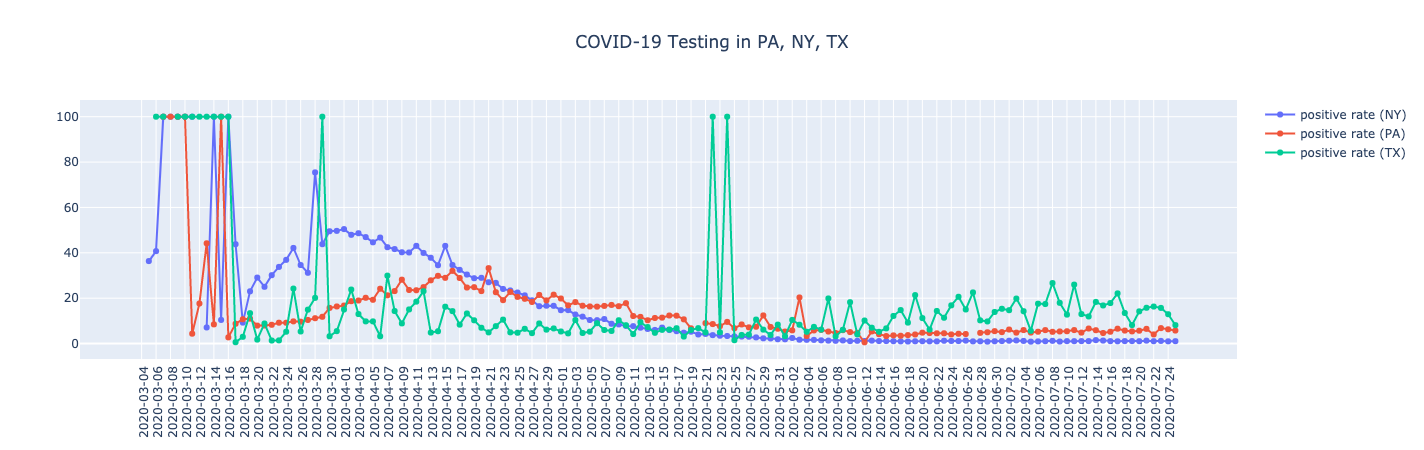

In [56]:
fig = go.Figure(data=trace_list,layout=layout)
fig.show()

## Rolling Average Plot 

In [81]:
# Rolling 7 day average
temp['7day_avg']=temp.groupby('state')['daily_positive_rate'].transform(lambda x:x.rolling(7,1).mean())

In [84]:
new_trace_list=[]

    
for region, gby in temp.groupby('state'):
    new_trace1 = go.Scatter(x=gby['date'].dt.date, y = gby['7day_avg'],
                        marker=dict(size=6),mode='lines+markers',
                        name='positive rate ({st})'.format(st=region),
                        yaxis='y2')
    new_trace_list.append(new_trace1)



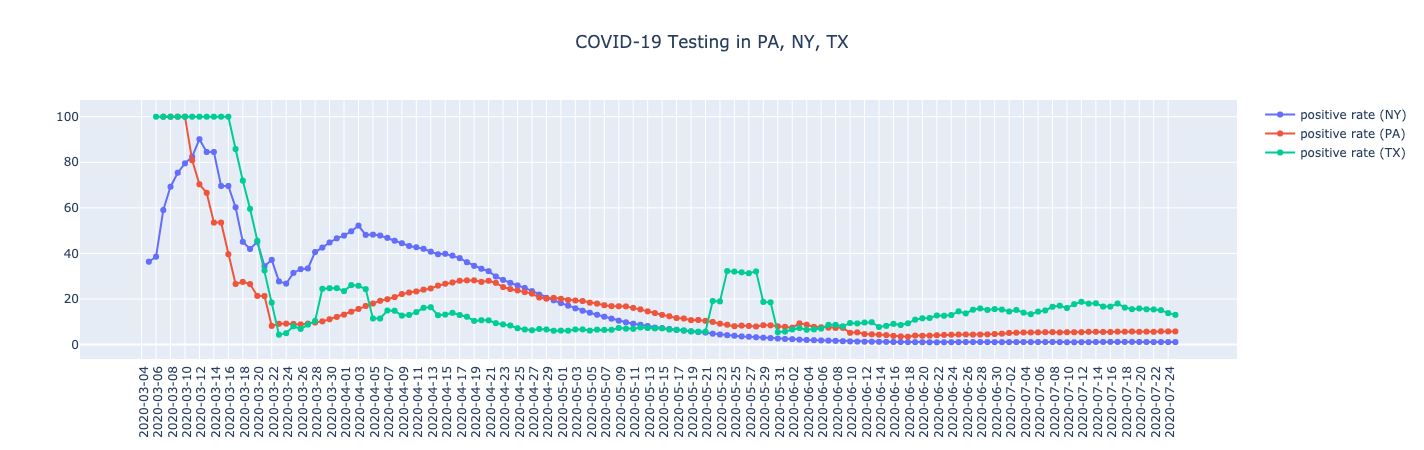

In [85]:
new_fig = go.Figure(data=new_trace_list,layout=layout)
new_fig.show()

## Let add a range slider

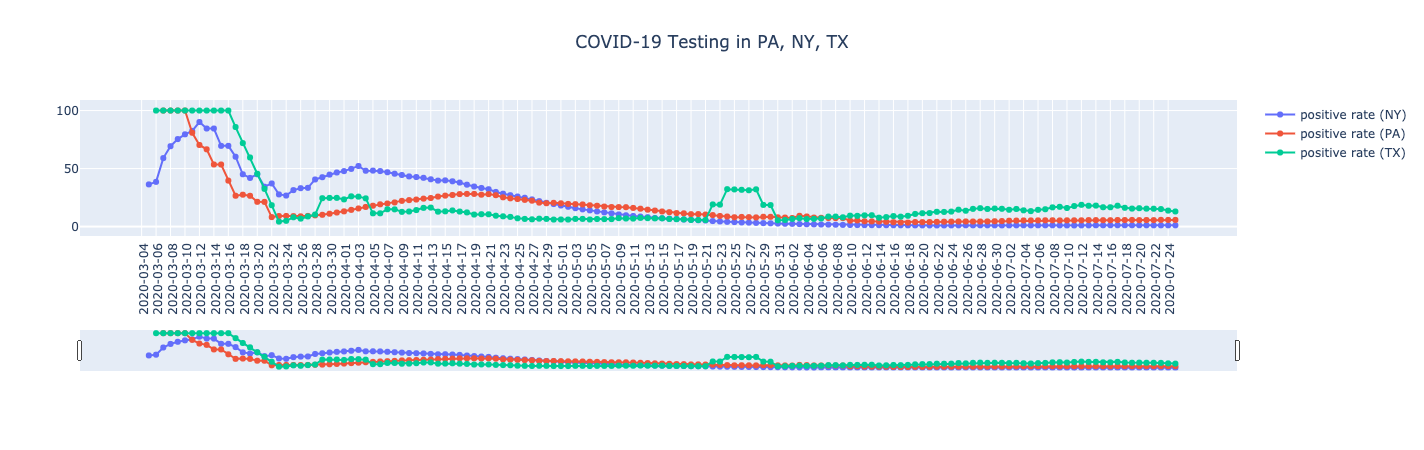

In [87]:
new_fig.update_layout(xaxis=dict(rangeslider=dict(
            visible=True
        ),type="category"
    )
)
new_fig.show()